# Reds Ramsay Data Models

This notebook holds the models for the Red’s Diner In Ramsay restaurant.

### Initialize Firebase connection and setup imports and constants

In [1]:
%run "../common/Firebase.ipynb"
%run "../common/Imports.ipynb"
%run "../common/Models.ipynb"

In [2]:
SALES_COL = "sales_data"
SALES_PRED_COL = "sales_data_pred"
ANALYTICS_COL = "analytics_data"
YEAR_DATA_COL = "year_data"
RED_RAM_LOC_ID = "kL5sgUcyko7sLSjsUWnK"

### Get Sales Data

In [3]:
sales_col = stage_db.collection(SALES_COL).document(RED_RAM_LOC_ID).collection(YEAR_DATA_COL)
sales_data = []

for sales_doc in sales_col.stream():
    sales_data.append(sales_doc.get(None))

remove_cols = ['DATE_FORMATTED', 'NET_SALES_2', 'TOTAL_REVENUE_1', 'TOTAL_REVENUE_4', 'GROSS_RECEIPTS_1', 'TAX_COLLECTED_1', 'GROSS_SALES_4', 'RETAIL_TOT_3', 'GST_4', '2%_OF_NET_SALES_4']
sales_df = pd.DataFrame(sales_data, dtype=np.float64)
sales_df.set_index('DATE', inplace=True)
sales_df.drop(columns=remove_cols, inplace=True)
sales_df.fillna(0, inplace=True)
display(sales_df)

GC_SOLD_NUM_3  50%_STAFF_ON_NUM_3  TOTAL_DISCOUNTS_1  \
DATE                                                                 
1.546326e+09            0.0                 0.0            -109.40   
1.546412e+09            2.0                 0.0             -33.71   
1.546499e+09            0.0                 0.0              -5.84   
1.546585e+09            0.0                 0.0             -71.77   
1.546672e+09            0.0                 0.0             -35.97   
...                     ...                 ...                ...   
1.577516e+09            0.0                 0.0            -106.28   
1.577603e+09            0.0                 0.0            -208.54   
1.577689e+09            0.0                 0.0             -90.60   
1.577776e+09            0.0                 0.0            -110.58   
1.577862e+09            0.0                 0.0            -107.01   

              BRUCE_MEAL_TOT_3  CHARGED_RECEIPTS_1  TIPS_PAID_1  \
DATE                                                              
1.546326e+09               0.0                 0.0        47.89   
1.546412e+09               0.0                 0.0         0.00   
1.546499e+09               0.0                 0.0        21.54   
1.546585e+09               0.0                 0.0        21.60   
1.546672e+09               0.0                 0.0        41.50   
...                        ...                 ...          ...   
1.577516e+09               0.0                 0.0        29.27   
1.577603e+09               0.0                 0.0         0.00   
1.577689e+09               0.0                 0.0        70.74   
1.577776e+09               0.0                 0.0         0.00   
1.577862e+09               0.0                 0.0        81.85   

              CHECKS_PAID_1  WEEKEND_STAFF_NUM_3  TIPS_PAID_4  RETAIL_NUM_3  \
DATE                                                                          
1.546326e+09          130.0                  0.0        47.89           0.0   
1.546412e+09           75.0                  0.0         0.00           0.0   
1.546499e+09           81.0                  0.0        21.54           0.0   
1.546585e+09           92.0                  0.0        21.60           0.0   
1.546672e+09          124.0                  0.0        41.50           0.0   
...                     ...                  ...          ...           ...   
1.577516e+09          107.0                  0.0        29.27           0.0   
1.577603e+09          133.0                  0.0         0.00           0.0   
1.577689e+09          105.0                  0.0        70.74           0.0   
1.577776e+09          107.0                  0.0         0.00           0.0   
1.577862e+09          134.0                  0.0        81.85           0.0   

              ...  POLICE_COFFEE_TOT_3  FAMILY_10%_NUM_3  BEER_TOT_3  \
DATE          ...                                                      
1.546326e+09  ...                 0.00              12.0       20.50   
1.546412e+09  ...                -3.75              12.0       34.50   
1.546499e+09  ...                 0.00               4.0        0.00   
1.546585e+09  ...                -7.50               8.0       20.50   
1.546672e+09  ...                 0.00               7.0       13.00   
...           ...                  ...               ...         ...   
1.577516e+09  ...                 0.00              13.0       16.00   
1.577603e+09  ...                 0.00              13.0       13.00   
1.577689e+09  ...               -18.75              21.0       24.00   
1.577776e+09  ...                 0.00              14.0       29.25   
1.577862e+09  ...                 0.00              27.0        8.00   

              DAWN_MEAL_NUM_3  SERVICE_CHARGES_1  MODIFERS_NUM_3  \
DATE                                                               
1.546326e+09              0.0                0.0           600.0   
1.546412e+09              0.0                0.0           298

### Preprocess Data

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)

In [5]:
# Split data into labels and features
labels = sales_df['NET_SALES_1']
features = sales_df.drop(columns='NET_SALES_1')

X_train, X_test, y_train, y_test = train_test_split(features, labels)

# Normalize data
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Exploratory Data Analysis

### Visualizations

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5  # Increase plot size

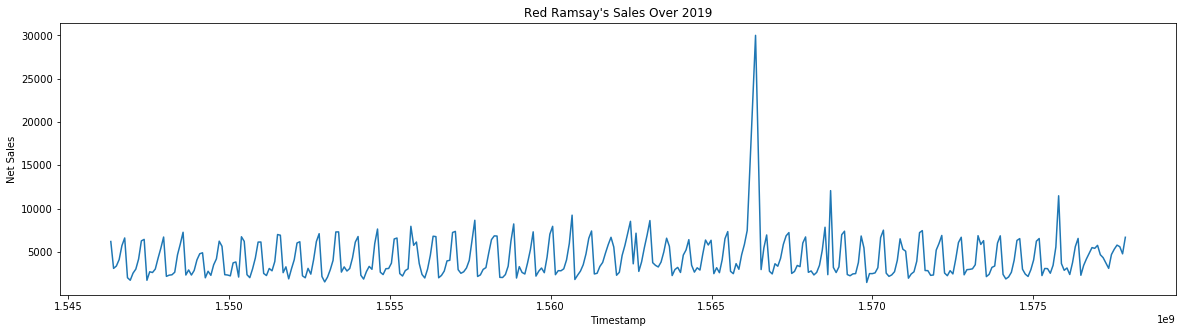

In [8]:
# Visualize sales
timestamps = sales_df.index
net_sales = sales_df['NET_SALES_1']

plt.plot(timestamps, net_sales)
plt.title("Red Ramsay's Sales Over 2019")
plt.xlabel("Timestamp")
plt.ylabel("Net Sales")
plt.show()

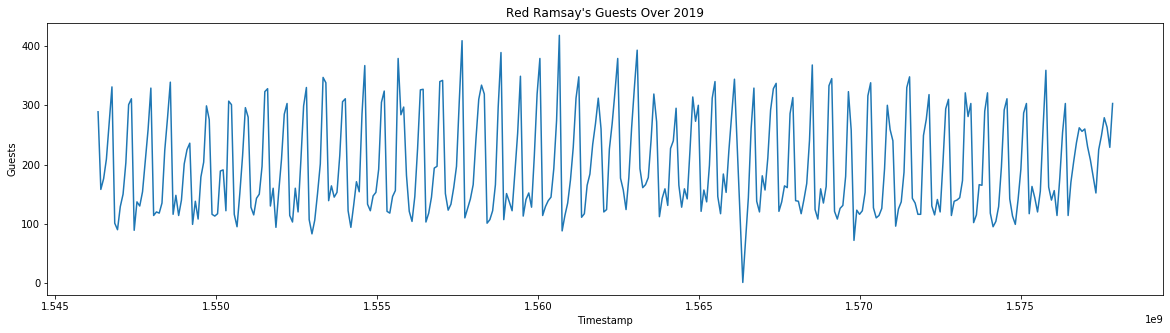

In [19]:
# Visualize guests
timestamps = sales_df.index
guests = sales_df['GUESTS_2']

plt.plot(timestamps, guests)
plt.title("Red Ramsay's Guests Over 2019")
plt.xlabel("Timestamp")
plt.ylabel("Guests")
plt.show()

### Principle Component Analysis (PCA)

In [11]:
from sklearn.decomposition import PCA

features_scaled = StandardScaler().fit_transform(features)

# Fit PCA to three dimensions
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

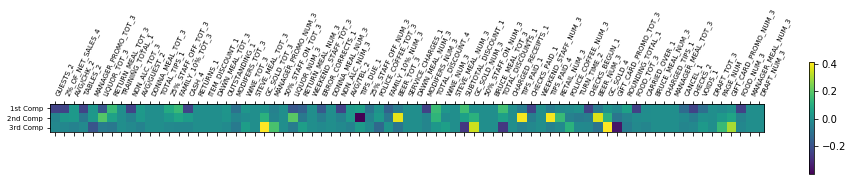

In [12]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0, 1, 2], ['1st Comp', '2nd Comp', '3rd Comp'], fontsize=7)
plt.colorbar()
plt.xticks(range(len(features.columns)), features.columns, rotation=65, ha='left', fontsize=7)
plt.tight_layout()
plt.show()

## Predictions

### Predict Sales

The idea to predict sales is to first find the probability distrubtion of each weekday and then generate predictions from the distrubtion. To get the distribution, we need to bin the sales into reasonable bins and find how the data is distrubuted.

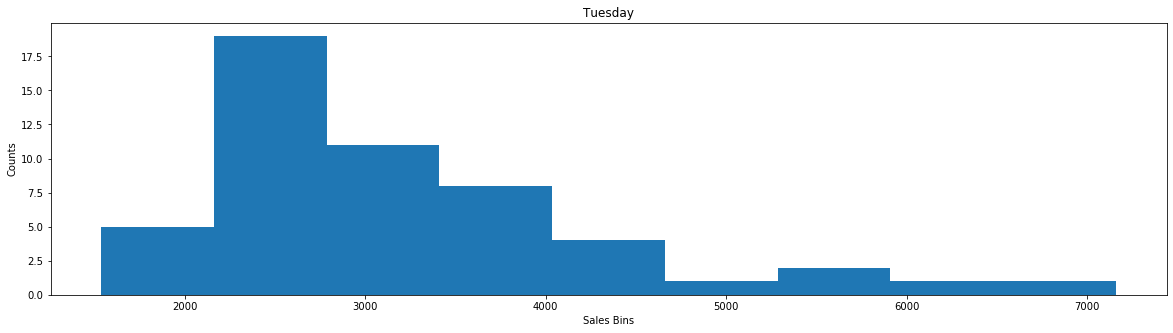

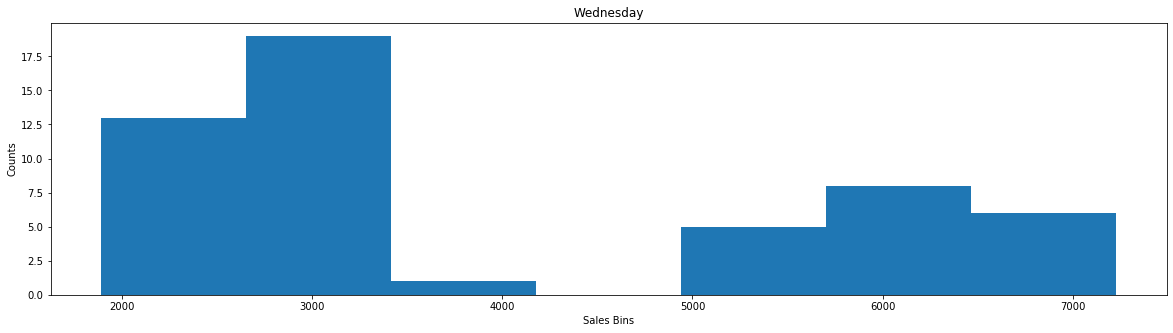

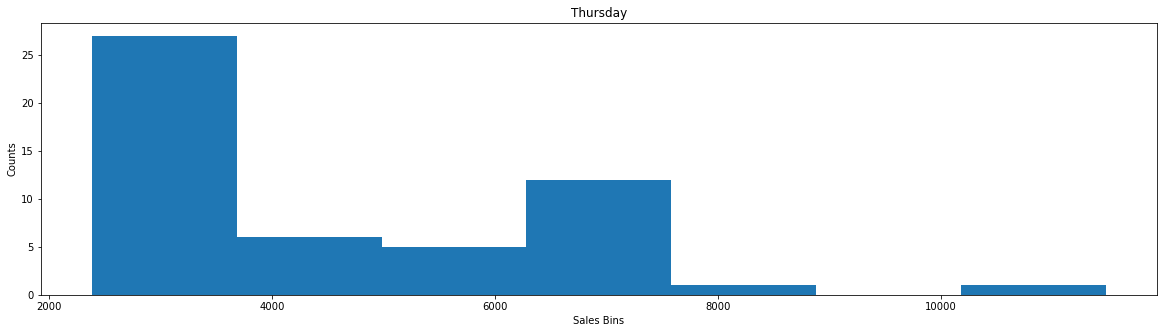

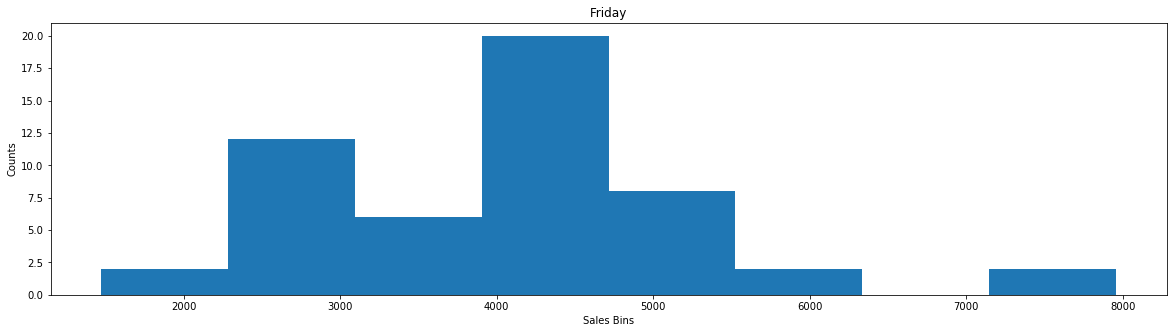

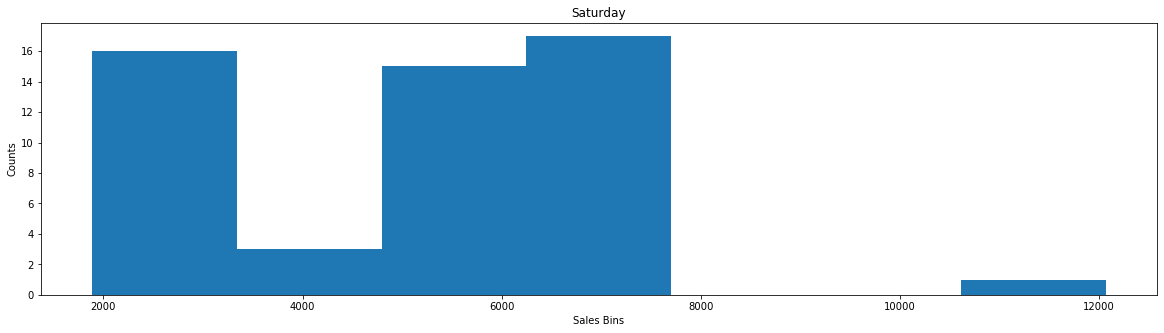

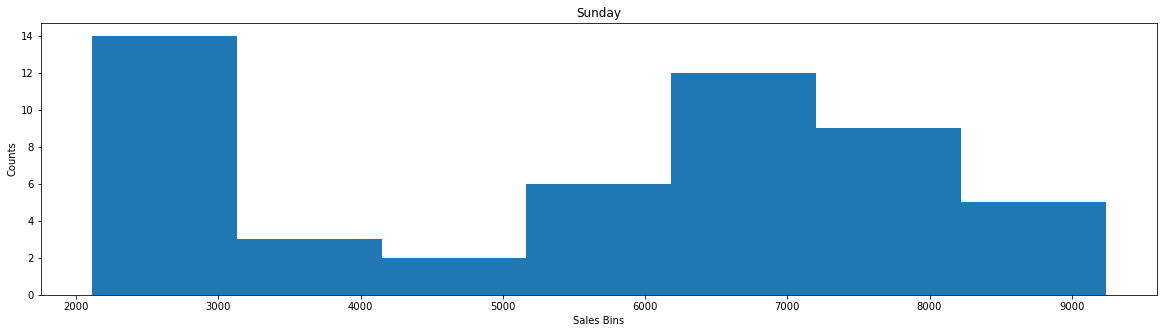

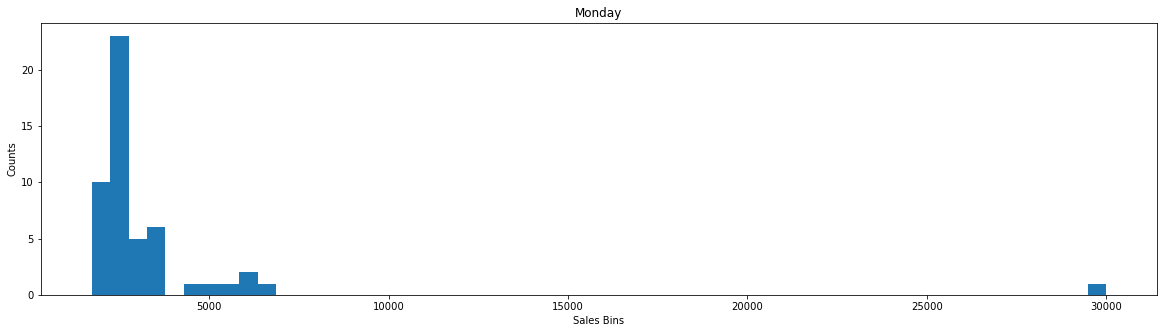

In [9]:
timestamp_to_sales = list(net_sales)

# Split sales into weekdays
tuesday_sales = (timestamp_to_sales[0::7], "tuesday")
wednesday_sales = (timestamp_to_sales[1::7], "wednesday")
thursday_sales = (timestamp_to_sales[2::7], "thursday")
friday_sales = (timestamp_to_sales[3::7], "friday")
saturday_sales = (timestamp_to_sales[4::7], "saturday")
sunday_sales = (timestamp_to_sales[5::7], "sunday")
monday_sales = (timestamp_to_sales[6::7], "monday")
week_sales = [tuesday_sales, wednesday_sales, thursday_sales, friday_sales,
    saturday_sales, sunday_sales, monday_sales
]

# print(tuesday_sales)
# print(np.min(tuesday_sales), np.max(tuesday_sales))
# print(np.mean(tuesday_sales), np.std(tuesday_sales))

for day, day_name in week_sales:
    plt.hist(day, bins='auto')
    plt.title(day_name.title())
    plt.xlabel("Sales Bins")
    plt.ylabel("Counts")
    plt.show()

In [11]:
# From the autogenerated histograms, 1000 seems to be an appropriate bin size
bins = [bin for bin in range(1000, 11000, 1000)]
sales_histogram_dict = {"bins": bins}

for day, day_name in week_sales:
    histogram = np.histogram(a=day, bins=bins, range=(1000, 11000))
    sales_histogram_dict[day_name] = histogram[0].tolist()

print(sales_histogram_dict)

{'bins': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], 'tuesday': [3, 25, 14, 5, 3, 1, 1, 0, 0], 'wednesday': [2, 20, 11, 0, 8, 10, 1, 0, 0], 'thursday': [0, 12, 20, 1, 5, 9, 4, 0, 0], 'friday': [1, 12, 7, 26, 3, 1, 2, 0, 0], 'saturday': [2, 13, 2, 2, 10, 17, 5, 0, 0], 'sunday': [0, 12, 5, 2, 3, 14, 10, 4, 1], 'monday': [3, 33, 8, 2, 1, 3, 0, 0, 0]}


In [13]:
# Add the histogram data to Firebase
analy_data_col = stage_db.collection(ANALYTICS_COL)
sales_doc = analy_data_col.add({}, "sales")[1]
sales_doc.collection(RED_RAM_LOC_ID).add(sales_histogram_dict, "data")

(seconds: 1584950488
 nanos: 940413000,
 <google.cloud.firestore_v1.document.DocumentReference at 0x1597a649d88>)

In [24]:
# Predict the sales for the next year (2020)
sales_pred = []

jan_first_twentytwenty = 1577862000
twentytwenty_timestamps = [jan_first_twentytwenty + (multiplier * 86400) for multiplier in range(1, 366)]

week_cycle = ["thursday", "friday", "saturday", "sunday", "monday", "tuesday", "wednesday"]
week_counter = 0

for timestamp in twentytwenty_timestamps:
    day_name = week_cycle[week_counter]
    day_prob_dist = sales_histogram_pred_dict[day_name]

    day_sales_pred = np.random.choice(a=bins_pred[:-1], p=day_prob_dist) + np.random.randint(bin_width)
    sales_pred.append(day_sales_pred)
    
    week_counter = (week_counter + 1) % 7

print(sales_pred)

[3083, 4494, 6243, 6149, 2611, 3988, 6909, 6551, 4279, 2044, 8634, 4653, 3980, 6806, 6548, 5041, 5984, 2477, 3684, 2930, 6071, 6504, 4122, 2447, 7973, 2621, 1788, 3183, 3070, 7966, 2834, 2307, 2212, 3286, 2254, 3189, 2309, 5473, 6474, 2380, 3496, 3198, 3300, 1457, 2282, 6762, 2357, 7109, 2568, 6831, 2728, 2113, 8212, 2120, 2274, 5886, 3040, 3885, 1840, 6147, 3413, 4027, 3689, 6731, 4602, 2857, 2145, 2063, 2756, 2758, 5885, 4875, 6022, 3162, 2644, 3502, 2770, 2939, 4616, 2497, 7346, 2359, 6250, 2503, 3916, 7232, 2183, 7678, 2624, 1812, 5194, 3093, 2663, 6246, 7655, 3707, 3429, 5102, 2963, 4941, 2527, 2357, 2918, 2639, 6268, 2636, 4779, 2943, 8559, 2654, 2319, 2874, 6889, 4025, 7195, 8261, 2778, 2562, 2953, 2804, 4102, 5852, 4163, 2337, 2475, 6018, 4584, 3858, 2226, 2351, 1826, 3724, 2330, 3386, 2870, 2496, 8294, 2062, 2509, 2843, 3735, 7923, 2489, 2411, 6255, 3739, 2659, 3077, 4860, 2944, 7976, 2337, 2395, 6689, 4551, 5099, 1862, 5634, 2924, 5303, 2792, 2350, 4232, 2846, 6790, 2307, 230

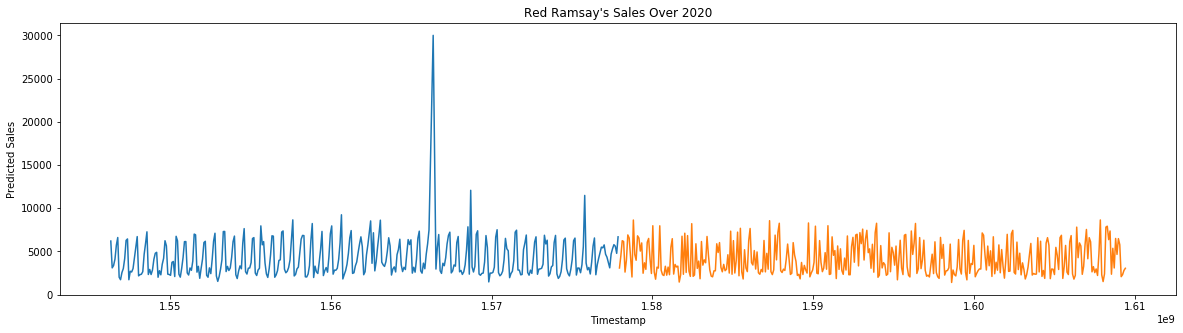

In [25]:
# Plot actual and predicted sales
plt.plot(timestamps, net_sales)
plt.plot(twentytwenty_timestamps, sales_pred)
plt.title("Red Ramsay's Sales Over 2020")
plt.xlabel("Timestamp")
plt.ylabel("Predicted Sales")
plt.show()

In [17]:
# Add predictions to Firebase
sales_pred_dict = dict(zip([str(timestamps) for timestamps in twentytwenty_timestamps], np.array(sales_pred).tolist()))
sales_pred_col = stage_db.collection(SALES_PRED_COL)
sales_pred_doc = sales_pred_col.add({}, RED_RAM_LOC_ID)[1]

for timestamp, sales_pred in sales_pred_dict.items():
    data = {'timestamp': timestamp, "NET_SALES_PRED": sales_pred}
    sales_pred_doc.collection(YEAR_DATA_COL).add(data, timestamp)

### Predict Guests

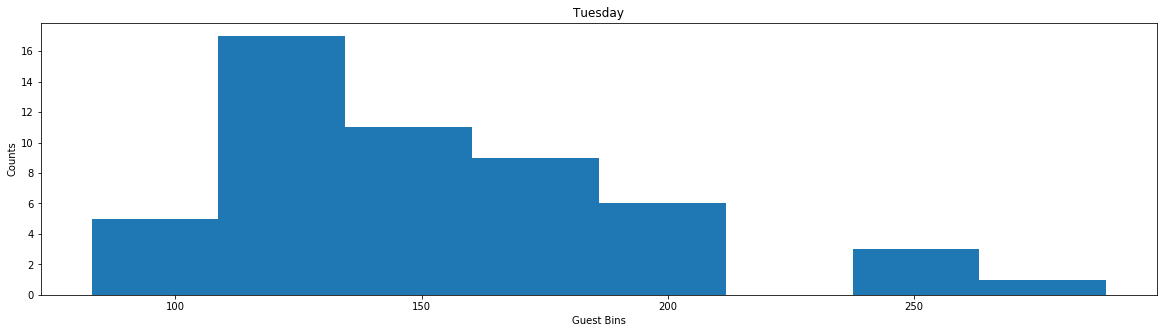

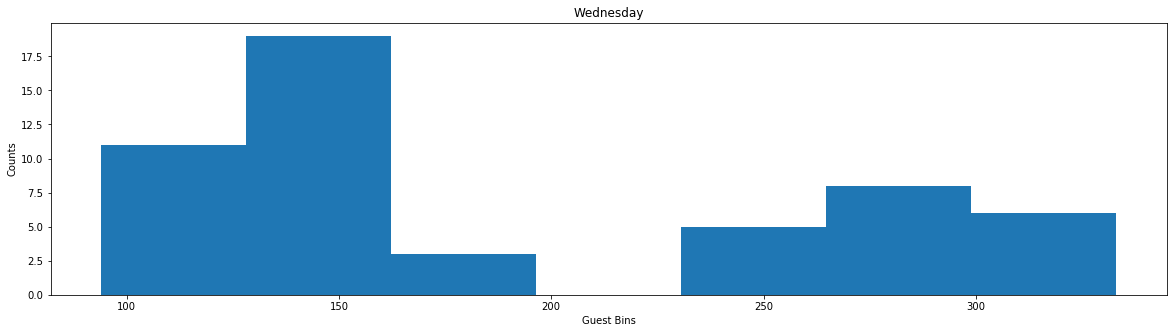

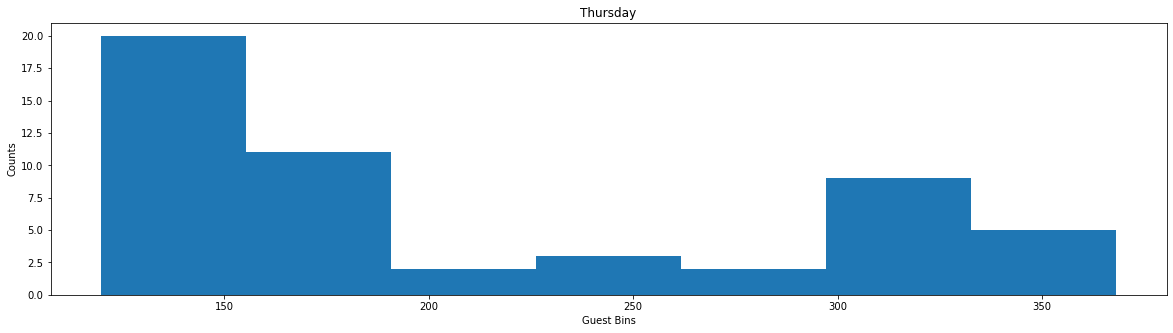

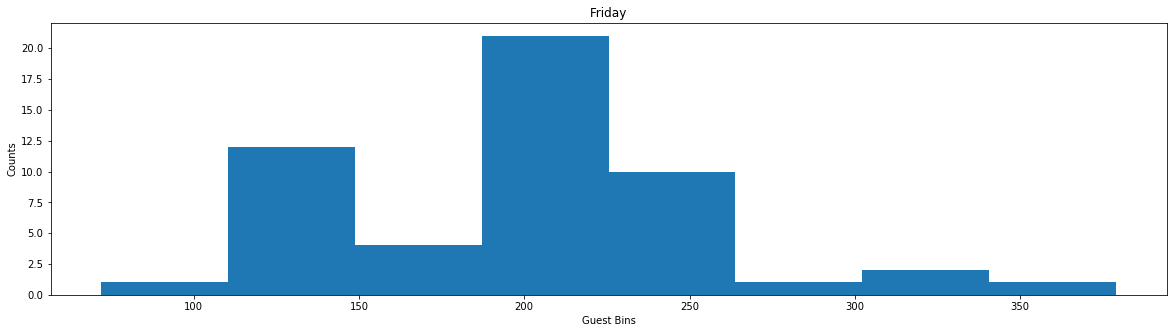

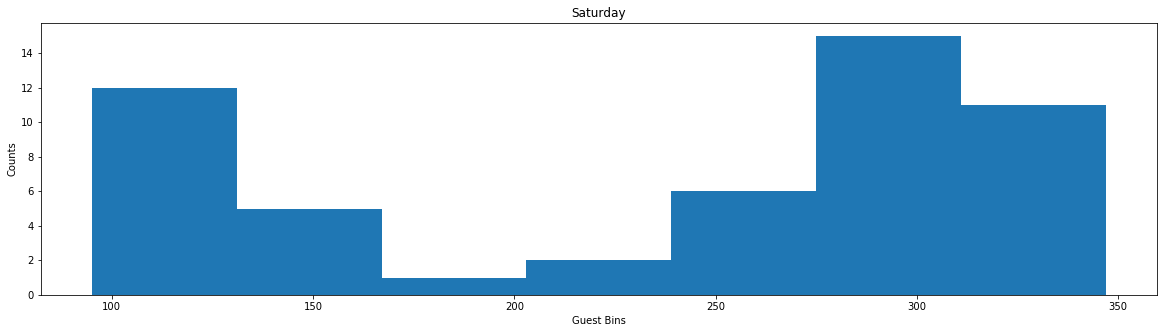

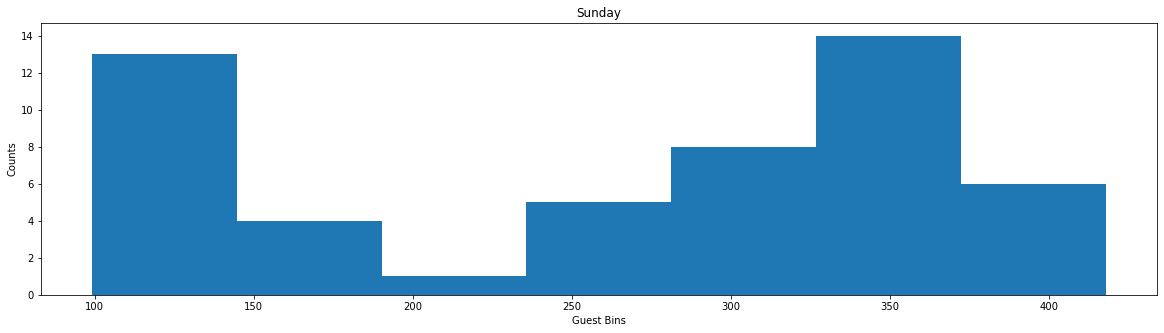

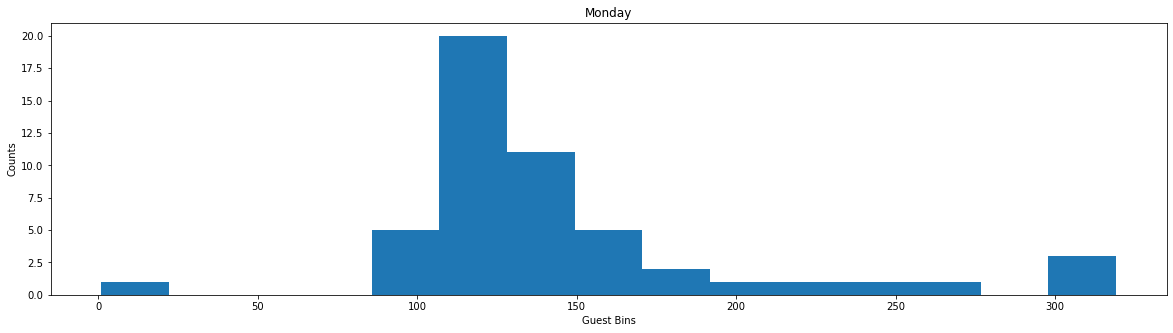

In [20]:
guests = list(guests)

tuesday_guests = (guests[0::7], "tuesday")
wednesday_guests = (guests[1::7], "wednesday")
thursday_guests = (guests[2::7], "thursday")
friday_guests = (guests[3::7], "friday")
saturday_guests = (guests[4::7], "saturday")
sunday_guests = (guests[5::7], "sunday")
monday_guests = (guests[6::7], "monday")
week_guests = [tuesday_guests, wednesday_guests, thursday_guests, friday_guests,
    saturday_guests, sunday_guests, monday_guests
]

for day, day_name in week_guests:
    plt.hist(day, bins='auto')
    plt.title(day_name.title())
    plt.xlabel("Guest Bins")
    plt.ylabel("Counts")
    plt.show()

In [21]:
bin_width = 50
bins = [bin for bin in range(0, 500, bin_width)]
guests_histogram_dict = {"bins": bins}

for day, day_name in week_guests:
    histogram = np.histogram(a=day, bins=bins)
    guests_histogram_dict[day_name] = histogram[0].tolist()

print(guests_histogram_dict)

{'bins': [0, 50, 100, 150, 200, 250, 300, 350, 400, 450], 'tuesday': [0, 3, 25, 18, 4, 2, 0, 0, 0], 'wednesday': [0, 2, 22, 9, 1, 12, 6, 0, 0], 'thursday': [0, 0, 11, 21, 1, 5, 12, 2, 0], 'friday': [0, 1, 12, 11, 23, 2, 2, 1, 0], 'saturday': [0, 2, 14, 2, 3, 14, 17, 0, 0], 'sunday': [0, 1, 12, 4, 2, 6, 19, 5, 2], 'monday': [1, 3, 33, 8, 2, 1, 3, 0, 0]}


In [22]:
# Add guest histogram data to Firebase
analy_data_col = stage_db.collection(ANALYTICS_COL)
guest_doc = analy_data_col.add({}, "guests")[1]
guest_doc.collection(RED_RAM_LOC_ID).add(guests_histogram_dict, "data")

(seconds: 1584950664
 nanos: 259736000,
 <google.cloud.firestore_v1.document.DocumentReference at 0x1597a74d248>)